Import the Libraries

In [13]:
# importing relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, recall_score,precision_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

Extract the features names

In [14]:
# extract the features names
names = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names', skiprows=32, sep=':\s+', engine='python', names=['attr', ''])
names = names['attr']
names = list(names)
names.append('label')
names

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

Read the Dataset

In [15]:
#read the dataset
mail = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', names=names)
mail.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Check null & duplicate values and drop

In [16]:
# if there are null values and duplicates this step will drop them
print(mail.isnull().sum(),"\n==================")
data = mail.dropna()
print(data.duplicated().sum())
data = data.drop_duplicates()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Split the data set into X & Y

In [17]:
# Split the dataset
X = mail.iloc[:, :-1]
y = mail.iloc[:, -1]

Get stastical describe of the dataset

In [18]:
mail.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


Split data into Train & Test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Feature Scaling

In [20]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Principal component analysis

In [21]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 45)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

Choose a K value for the Model

In [22]:
#choose a value for K
error_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

/Users/chalana/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/chalana/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

Text(0, 0.5, 'Error Rate')

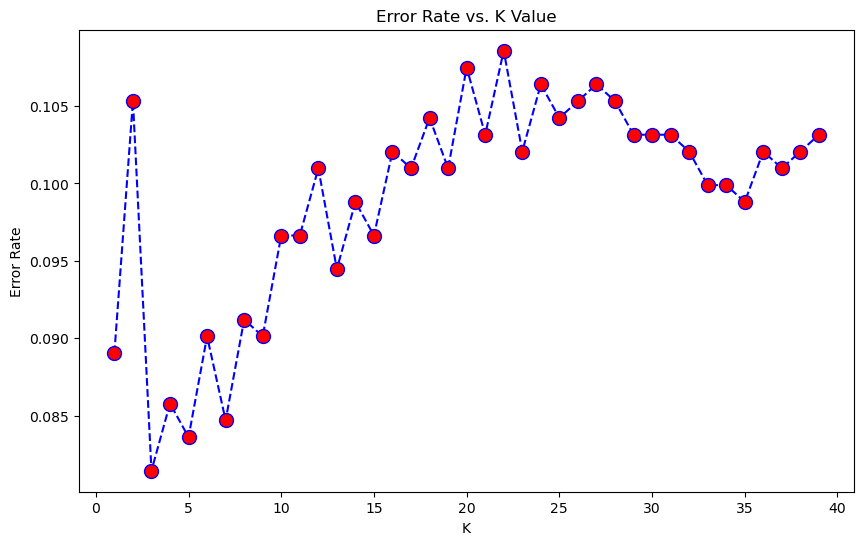

In [23]:
# plot the Error rate vs K Value graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Train KNN Model

In [24]:
# Train the KNN model
classifier = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Evaluation of the Model

In [25]:
# Predict the target variable for the test data
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0
 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0
 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0
 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1
 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 

/Users/chalana/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
# Evaluate model
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[530  34]
 [ 41 316]]


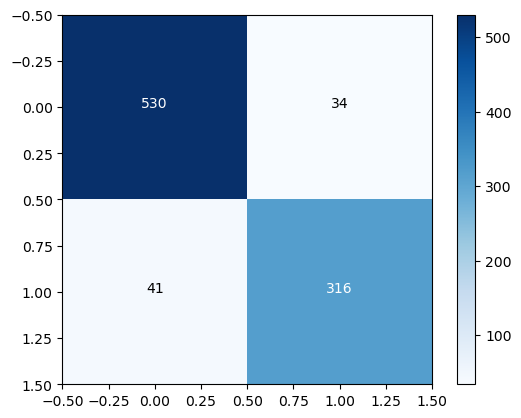

In [27]:
# plotting the confusion matrix
import matplotlib.pyplot as plt
import numpy as np

# Plot confusion matrix
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))

# Add values to confusion matrix plot
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

In [31]:
# Calculate the other accuracy scores
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [29]:
print("accuracy score is : ", accuracy)
print("f1 score is : ", f1)
print("recall score is : ", recall)
print("precision score is : ", precision)

accuracy score is :  0.9185667752442996
f1 score is :  0.8939179632248938
recall score is :  0.8851540616246498
precision score is :  0.9028571428571428


In [32]:
# plot the classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       564
           1       0.90      0.89      0.89       357

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.91       921
weighted avg       0.92      0.92      0.92       921

